# Automatic Drum Tab Project
This Jupyter Notebook is the product of Thomas Hymel. The contents pertain to the subject of Automatic Drum Transcription (ADT). Its main purpose is to learn how to use Jupyter Notebooks to compile and explain a project, to practice with Python on a project with time series data, and to develop data set preparation skills on a project that attempts to answer the question: **can an algorithm take a song as an input and output a human-readable drum tab of the drums in that song?**

### Background of Drum Tabs and My Experience with Tabbing
I love music. I am particularly drawn to drums, and taught myself how to play drums when I was 17. To learn, I picked some of my favorite songs and attempted to learn them on the drums. To facilitate this process, I would look up and print out freely available drum tabs online. These tabalatures describe, to various degrees of specificity as determined by the tab creator, the drum track in an easy-to-read format. For this ease of use simplification, a trade-off is usually made with music tabulature in that it loses some essential information about the music (for example, guitar tabs normally do not contain temporal notations. You need to figure out how to strum it, hold notes, etc.) However, because drum notes are nearly all instantaneous events, a map of the onset of the events is effectively the same as a fully annotated sheet of music (in my opinion). Thus from now on, **when I refer to the term drum tab, I will assume that it contains all the information necessary to faithfully recreate a drum track by a human.** Because of this stance, I believe that it should be possible to train an algorithm to learn how to automatically tab drum tracks based mainly on training human-created drum tabs. That is, I believe that drum tabs have labels specific enough in resolution to properly label a music track.

Because of my eclectic and specific taste in music, namely the post-hardcore genre, drum tabs of my favorite songs and bands were hard to come by. I took it upon myself to listen and tab some of my favorite songs. Initially I was slow, but as I tabbed more I got more efficient at it. Eventually I became more sophisticated with my transcibing methods, like listening at slower speeds, and applying band pass filters to try to isolate the drums from the rest of the music track. If I am tasked with tabbing a 4 minute song, the time-to-tab heavily depends on the complexity of the drum track. For easy drum tracks, I can tab them in ~2-4 hours, and for difficult drum tracks, ~6-9 hours. My current estimate for the amount of human hours it takes me to add 1 hour of perfectly tabbed music is around 75 hours. So the following additional data acquisition rate is **75 hrs of labor = 1 hr of drum tabbed music**. 

**The following is a snapshot of a tab I created.** The full tab can be found [here](https://www.ttabs.com/tabs.php?id=254322). The song is [Let It Enfold You by Senses Fail](https://www.youtube.com/watch?v=0fwLvHR7Rgw), if you want to attempt to follow along with the drum tab.

```
BPM: 134
Drums:
S = Snare
t = small mounted tom
T = medium tom
FT = floor tom
B = bass drum
|-x-| on the bass drum = use both left foot and right foot to hit the bass drum but with a slightly different timing
|-f-| = flam

Cymbals:
C = basic crash cymbal
C2 = High sounding crash cymbal. 
NOTE: G on C2 means a China sounding cymbal
C3 = not necessarily higher sounding crash cymbal but more cutting.
|-X-| = on hihat, loose; Otherwise accented hit.
|-b-|: Hit bell of cymbal
|-d-|: Double hit

My fifth drum song tabbed. 

Intro:
S |----------------|----------------|----------------|------------f---|
                                                     |1e+a2e+a3e+a4e+a|

C2|X---X---X---X---|X---X---X---X---|X---X---X---X---|X---X---X-X-G---|
S |----o-------o---|----o-------o---|----o-------o---|----o----o--o---|
B |o--x--o---o---o-|o--x--o---o---o-|o--x--o---o---o-|o--o--o---ox--o-|
  |1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|

C3|X---------------|----------------|X---------------|X---X---X---X---|
C2|X---X---X-X-X---|X---X---X---X---|X---X---X---X---|----------------|
S |----o-------o---|----o-------o---|----o-------o---|--------o--o----|
B |o--o--o---o---o-|o--o--o---o---o-|o--o--o---o---o-|o--o--o-------o-|
  |1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|

Verse 1:
C2|X---------------|----------------|----------------|----------------|
HH|----X---X---X---|X---X---X---X---|X---X---X---X---|X---X---X---X---|
S |----o--o----o--o|----o-------o-oo|----o--o----o---|----o-------o---|
B |o-o--o--o-o-----|o-o--o--o-o-----|o-o--o--o-o--o--|o-o-----oooooooo|
  |1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|

C2|----------------|----------------|----------------|------------X---|
HH|X---X---X---X---|X---X---X---X---|X---X---X---X---|X---X---X-------|
S |----o--o----o--o|----o--o----o-oo|----o--o----o--o|----o-------o---|
B |o-o--o--o-o--o--|o-o--o--o-o-----|o-o--o--o-o--o--|o-o-----oooooooo|
  |1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|1e+a2e+a3e+a4e+a|
```



### Background of Automatic Drum Transcription
Most of my background in this subject came originally from this great 2018 review paper: [A Review of Automatic Drum Transcription by Chih-Wei Wu, et. al.](https://ieeexplore.ieee.org/abstract/document/8350302)

In the machine learning literature, ADT applies to a wide scope of different tasks and goals. Most ADT systems focus on the detection and recognition of the onsets of transient and impulsive events, which could be described similarly to other audio signal processing problems like audio surveillance and acoustic event detection. There are tasks like Drum Sound Classification (DSC), which aims at automatic instrument classification of recordings of *isolated* drum sounds, and Drum Transcription in the presence of other Musical (DTM) instruments, which aims at detecting and classifying the occurrences of different drum sounds in full-mixture music such as pop, rock, and jazz recordings. 

**I am most interested in DTM,** because it most accurately reflects what I do when I tab drums. The main goal in DTM is to extract onset times of different drum instruments from a continuous audio stream, such as a song. **For assessing the accuracy of the onset times and detection algorithms, normally the metrics of Precision, Recall, and F-measure are used.** A detected onset is counted as a true positive if its deviation from the ground-truth annotation is less than a pre-determined tolerance window. A false positive occurs when a detected onset does not coincide with an annotated drum onset event. A fals negative occurs when a drum event occurs but is not detected by the algorithm.

The tolerance window is an important parameter to consider, especially for my goal of drum tabs. The time resolution of most drum tabs is a 16th note grid (and sometimes a 32nd note grid) based on the beats-per-minute (BPM) of the song. Perceptionally, the lower bound of the time-gap which allows humans to identify two click sounds as separate is somewhere in the range of 8-10 ms. In the ADT literature, the common tolerance window sizes used include 50 ms, 30 ms, and 20 ms. To put this into tabbing perspective, if you have a X BPM song, the beat length in seconds is equal to (1 / (X / 60)) = (60/X) seconds. A beat is normally the length of a quarter note, and if we assume a 16th note tabbing grid, then the time resolution of that 16th note grid is given by (60/X)/4 = 15/X in seconds, or 15000/X ms. **For a song of X BPM, the 16th note grid resolution is 15000/X ms.** A 16th note grid at 100 BPM represents a 150 ms resolution, and one at 150 BPM represents a 100 ms resolution. A song at 200 BPM (in the way we have defined it), which is roughly the maximum that you might encounter under any normal circumstances, has a 16th note grid at 75 ms resolution. In order for an algorithm to tab a drum track, the tolerance window must be at most half of the 16th note grid resolution

### Current Challenges in ADT
Even though drum events can be described mainly as instantaneous and transient events, there are still many degrees of freedom that make it difficult to automatically classify drum events. The most challenging topics include interference of other instruments (and the variety of drums and cymbals), different playing techniques (basic rudiments, stick variations), recording conditions and post production, and insufficient real-word datasets. Insufficient data sets are a problem due to the complexity of music, the difficulty of generating labels, and the restrictions of intellectual property laws. These challenges make building and then *sharing* annotated datasets non-trivial. 

**Insufficient amount of data is the most common issue for those tackling ADT.** The total duration of most data sets is less than a few hours (1 hour = 3,600 seconds, so under 10,000 seconds). If you assume 1 song = 4 minutes = 240 seconds, then 10 songs = 2,400 seconds, and ~42 songs to hit 10,000 seconds. If a single time step of input data is assumed to be 100 ms, 1/10 seconds, then 10,000 seconds gives us 100,000 input data points. To get 1 million data points, we would need ~420 songs, and 10 million data points is ~4,200 songs. To put this into perspective with current (Apr. 2020) freely available drum tabs, [Ultimate-Guitar](ultimate-guitar.com) lists 3,463 whole song drum tabs on their website, which probably includes duplicate drum tabs for the same song. Note that a data point as mentioned here could have no drum event labels at all, or it could have multiple drum events, such as when a cymbal and bass drum is hit at the same time.

For this insufficient data problem, I (perhaps naively) see three ways in which I could *potentially*, personally help to address such a challenge. 
1. Randomly generate massive amounts of labeled data sets using Virtual Studio Technology (VSTs)
2. Manually and automatically produce labeled data sets using freely available drum tabs
3. Find a suitably large, labeled drum-only data set and automatically add drumless music to it to produce a DTM data set

Before jumping into these potential solutions, let's first look at what the currently available, manually "well-labelled" data sets look like to get a good sense of what is expected from the ADT literature.

##### Currently Available Data Sets
One freely available data set is from the paper **_Real-Time Transcription and Separation of Drum Recordings Based on NMF Decomposition_** by Christian Dittmar and Daniel Gartner in the Proceedings of the 17th International Conference on Digital Audio Effects (DAFx-14) in 2014, and is referred to as IDMT-SMT-Drums [(link)](http://www.dafx14.uni-erlangen.de/papers/dafx14_christian_dittmar_real_time_transcription_a.pdf). This is solely drum recording containing kick drum, snare drum, and hihat. The description of the training data in the paper is the following:
>  A training set was created for initialization of single drums (kick,
snare, hi-hat) in [3]. In order to capture the individual characteristics, the drums were hit separately with varying velocity. For
recording, an overhead microphone at a fixed height of 1 m was
used. The recordings were made with 10 different drum kits, consisting of different drum sizes and a broad range of materials. The
size of the kick drum ranges from 18 inch to a 24 inch diameter,
and depths of 16 inch up to 22 inch. Materials were birch, mahogany or maple. The snare drums all had the same size of 14
inch diameter and 6.5 inch in depth but different materials (such as
metal, wood or acrylic). The sizes for hi-hat ranged from 13 inch
to 15 inch. A second subset was generated using sample-based
drum sets from the BFD6
plug-in. The third part of the set featuring purely synthetic drum kits was generated using Steinberg’s
Groove Agent7
plug-in. The onsets were transcribed manually by
an experienced drummer using the software Sonic Visualiser.

After looking through the dataset, it is indeed a compilation of individually recorded snare, bass, and hihat hits in different patterns, and mixed together. The labels are the instrument and the onset times for each event, down to the 10th of a ms (A.BCDE seconds). An example is shown below. This data set can only be used in the training data, but not the dev or test set, because DTM is the main goal and this is isolated drums only.
>   `<event>
      <pitch>0</pitch>
      <onsetSec>1.2898</onsetSec>
      <offsetSec>1.2898</offsetSec>
      <instrument>HH</instrument>
    </event>`

Another freely available data set is from the paper **_ENST-Drums: an extensive audio-visual datadase for drums signal processing_** by Olivier Gillet and Gael Richard in 2006 [(link)](http://ismir2006.ismir.net/PAPERS/ISMIR0627_Paper.pdf). This paper was written to create and detail an extensive (at the time) data set of labelled drum tracks. Three professional drummers were sonically and visually recorded, and played a variety of inidividual hits, sequences and solos, across many genres and styles and sometimes alongside a backing track of music. The drummers never had to follow a score or imitate a reference pattern. Afterwards, utilizing the video as a reference guide, the audio tracks were annotated by hand as a text file contianing a list of (time, event) pairs. The tables below, copied directly from the ENST-Drums 2006 paper, show a summary of the number of events and the labels used in the annotation. 
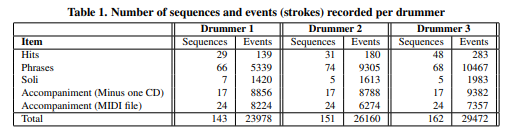
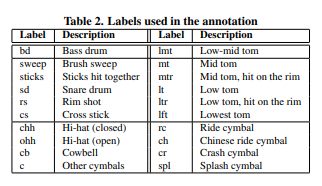
The paper notes that the total duration of audio material recorded per drummer is around 75 minutes, or ~ 225 minutes of audio. Looking at Table 1, the total number of events recorded is just under 80,000, more than half of which are accompanied by music, and thus directly usable for DTM purposes. If there are in total 50,000 DTM events recorded, how many annotated drum tabs is that equivalent to? Looking back at the example tab above, in the first 12 measures (48 beats) of real music there are 149 events, averaging out to 3.1 events per beat. The 134 BPM of the song is equivalent to 2.23 beats per second, yielding 6.9 events per second. That song is 304 seconds long, which gives  about 2,000 events for the entire song. If this were a usual average, that means **~25 tabbed songs are necessary to equate to the 50,000 DTM events in the ENST-Drums data set.** This data set could be useful as it contains a significant amount of DTM data. In my entire life, I have probably tabbed about 25 drum tabs. Additionally, the labels are extremely detailed and cover all aspects of a normally used drum kit.

Another freely available data set is from the paper **_Towards Multi-Instrument Drum Transcription_** by Richard Vogl, Gerhard Widmer, and Peter Knees in 2018. This paper focused on expanding the normal classification from 3 classes to 18 classes. To do this, they needed a much larger data set and produced **a synthetic one with 4,197 tracks with an overall duration of 259 hours.** They did this by gradding full MIDI tracks of western popular music from a freely available online collection. The MIDI tracks were split into drum and accompaniment tracks. The drum tracks were then rendered utilizing 57 different drum kits, covering a wide range of acoustic kits and electronic drum machines. The paper doesn't give absolute numbers for drum events (only relative numbers across the different classes), but it's safe to say that the number of DTM events in this dataset is _drastically_ more than the amount of DTM events in the ENST set. The dataset is 36 GB compressed, and since I haven't downloaded it yet I don't know what it is uncompressed. 

In the process of making this notebook, a new freely available dataset was published on March 31st, 2020 by people at Magenta (Google and Google Brain Team) [(arxiv paper link)](https://arxiv.org/pdf/2004.00188.pdf), called the **Expanded Groove MIDI Dataset (E-GMD)**. E-GMD contains **444 hours of audio** from 43 drum kits, and includes annotations of velocity in the MIDI labels. There were 1,059 unique sequences recorded by a human drumming on an electronic drum set, that were then fed through the Roland TD-17 drum brain with 43 different kits to get 43 different synthesized audio instances of those sequences. The dataset is freely available and is 132 GB uncompressed.

One important question to ask when tackling a new ML problem is how difficult it would be to get 10 times the amount of training data you currently have. Is there an easier way through data augmentation? 

### Generating Data Sets Idea 1: Randomly with VSTs
Virtual Studio Technology (VST) is an audio plug-in software interface that uses digital signal processing to simulate traditional recording studio hardware in software. VSTs are widely available in both commercial and freeware, and almost all digital audio workstations (DAW) have support for VSTs. VST plugins are either instruments (VSTi) or effects (VSTfx). For my purpose, I will refer to instruments and effects collectively as VSTs, and normally when I use VSTs I will be talking about the instrument sampling. VSTs include software emulations of hardware synthesizers and samplers, and can also trigger samples of audio tracks. VSTs are normally triggered via MIDI (Musical Instrument Digital Interface) in a DAW. 

A popular drum VST is FXpansion's BFD3 software. BFD3 has a full graphical interface which allows a huge variety for flexibility of a virtual drum set. The picture below shows the interface for BFD2, a previous version of the BFD line of software which I own. Note the amount of flexibility of the exact tailoring for the drum kit: there are 10, 18, or even 32 piece sets. For each drum set piece, you can change the panning, how close the "virtual microphones" are to the pieces, the dampening, the tuning, and the velocity response as a function of MIDI input. 

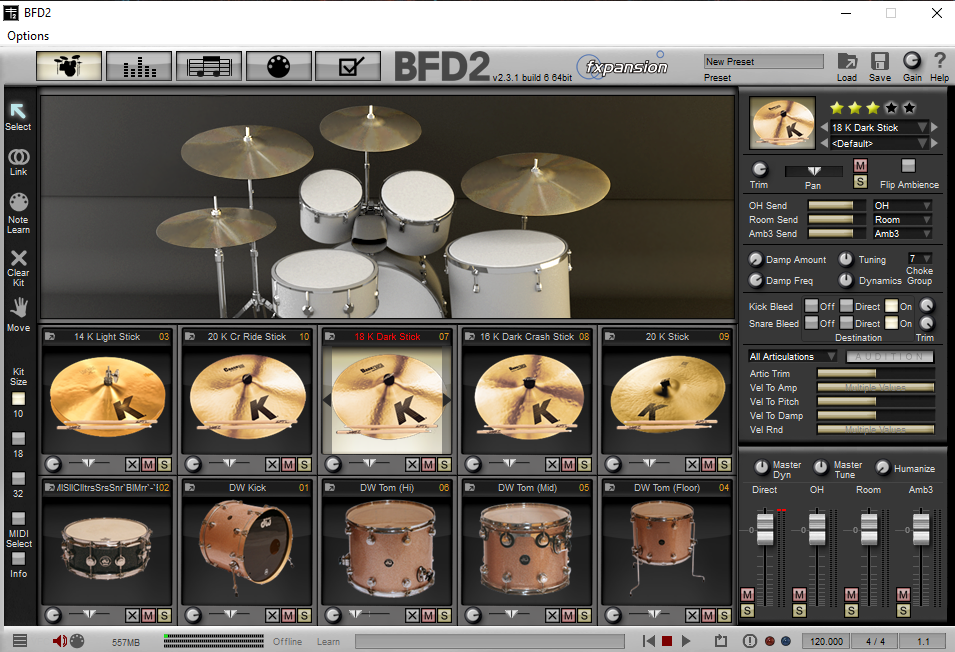

This VST software would used as a plug-in in a DAW (my preferred DAW is Reaper by Cockos). The BFD software includes not only this graphical interface but also the drum sample tracks that are digitally selected, altered, and then triggered by a MIDI track inside of an DAW. For example, I currently have 71 GB of .WAV files on my computer, and ~95% are files used to trigger the drum pieces (basses, snares, toms, hihat, cymbals, etc.) Each piece has its own folder with anywhere from 20 to 30 different velocity hits, with each track about 8 seconds long to fully capture the decay of any hit. **That is, these files represent a huge array of human-curated drum-only audio tracks.** The BFD software is a gigantic function that takes in these audio tracks, digitally alters them according to the user's liking (as set by the user interface) and outputs a proper "realistic" drum audio track, as triggered by the MIDI track in the DAW. Recall that I'm interested in DTM, drum transcription in the presence of music. Where can the music come from? 

Of course MIDI tracks can also be used with other VSTs that simulate pianos, keyboard, violins, celli, flutes, harps, and other instruments usually by triggering some real, digitally altered audio tracks. This method is how lots of musicians will demo music tracks during the creation and writing process. **By combining drum VSTs and other music VSTs, theoretically tracks of "music" could be created in an automated process by randomly triggering drum hits and other musical instruments together.** The drawback to this method (and the reason why "music" is in quotations) is that there wouldn't be any short- or long-range order to the beats because it wouldn't be made with any sort of structure. For simplicity, I imagine you could simply trigger randomly, with some delay between hits, any of the drum classes while also on a different track randomly adding VST melodic instruments. After the track is sufficiently long in length, the track is rendered and the MIDI locations are automatically matched up with the corresponding WAV render. 

From the papers I have read so far, this method hasn't been done because **normally the goal is for a model to learn the short- and long-range patterns in drum tracks (primarily for later drum track creation)**. However, if the goal is to only classify drum tracks into tabulature, with no need to learn where the next "best sounding" bass drum hit should be, short- and long-range order is not truly necessary. **My current perspective is that an onset itself, or rather a huge collection of well-labeled onsets themselves, is sufficient to train a drum transcription model**. I am not interested in drum track creation so this is a legitimate way to use data augmentation to get a large data set. Furthermore, if the entire process were completely automated and robust (that is, no errors in combining the WAV and MIDI label onsets), the dataset could be thrown away as quickly as it were created. Training would be similar to "online training" where you get a continuous stream of new data, use the data point once, and then throw it away (in this case, have it be deleted from memory/storage). 

At this point in time and at my current coding skill-level, **I don't feel comfortable tackling this specific generating dataset idea.** This idea involves interfacing with multiple programs at once in an automatic fashion, rendering and saving audio clips, and streamlining the process to run as quickly as possible. The tools I would need to learn to use is outside the scope of the purpose of this notebook and project. 

### Generating Data Sets Idea 2: Aligning Drum Tabs with Music
There exists a number of drum tabs online that have been provided collectively by different users submitting them to websites like ultimate-guitar.com or ttabs.com. If these tabs are aligned with their source song, it would be possible to create a data set of real music that all have drum tab labels for the entire song. **I am making the assumption that the onset times that can be mathematically derived from the drum tabs, and then aligned with the labels in the tabs, are good enough for the purpose of training an automatic drum tab algorithm.** This assumption may not turn out to be true, or at least strong enough for an algorithm to work well enough. There are many potential hurdles to overcome in this task.

1. Format inconsistency
2. Quality inconsistency
3. Classification specificity inconsistency 
4. Availability of Source Songs
5. Alignment issues with respect to tempo changes, triplets, other tabbing artifacts

There is no single master format that every user follows that allows for tab-to-tab consistency, but there should be enough shared similarities in the starting templates that users often begin with to manually, and ideally automatically with scripts, change the tabs to a single master format. For example, given the tab example above, I could imagine a type of master format where each 16th note column is a single row of data in a Pandas dataframe, and where the dataframe columns represent each possible drum piece. The values in the dataframe themselves denote the labels of each data entry. After a consistent labelling scheme is applied to all the rows, the entire tab is aligned to an audio file of the song. At that point the audio file is diced into equal-time-length sections, according to the song length and BPM in the tab, and each tiny 50-100 ms section (X input) is associated with its dataframe tab row (Y output labels). 

Addressing the five problems above would be the bulk of the work associated with generating a dataset (or, more likely, a validation+testing dataset) via this method. The work would mainly be done in Python, coding how to handle different cases of tabs into the master format. It also would be general organization work, like aggregating tabs and their songs, aligning things properly, testing any written code rigorously, creating more drum tabs myself if necessary, etc. **I suspect that at my current coding skill-level I would be able to pull this off with some effort**, and thus have started its own Jupyter Notebook linked here to go through this specific idea. 


### Generating Data Sets Idea 3: Combining Drumless Background Music with Labeled Drum-Only Data Set

#### List of Useful Shortcuts

* Ctrl + shift + P = List of Shortcuts
* Enter (command mode) = Enter Edit Mode (enter cell to edit it)
* Esc (edit mode) = Enter Command Mode (exit cell)
* A = Create Cell above
* B = Create Cell below
* D,D = Delete Cell
* Shift + Enter = Run Cell (code or markdown)
* M = Change Cell to Markdown
* Y = Change Cell to Code
* Ctrl + Shift + Minus = Split Cell at Cursor
